# Importing Modules and Loading Iris Flower Dataset

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing the dataset
from sklearn.datasets import load_iris

**dataset in the variable**

In [6]:
flowers = load_iris()
dir(flowers)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

**Checking no of rows and columns**

In [10]:
print(f'rows = {len(flowers.data)}')
print(f'cols = {flowers.feature_names}')
print(f'cols = {flowers.target_names}')

rows = 150
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cols = ['setosa' 'versicolor' 'virginica']


**Inference**: We have 150 datapoints, 4 columns, and 3 category of flowers

# Making Pandas Dataframe and Preprocessing

In [12]:
df = pd.DataFrame(data=flowers.data, columns=flowers.feature_names)
df['target'] = flowers.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**checking datatype and null values**

In [14]:
temp = pd.DataFrame()
temp['null'] = df.isnull().sum()
temp['dtype'] = df.dtypes
temp

,null,dtype
sepal length (cm),0,float64
sepal width (cm),0,float64
petal length (cm),0,float64
petal width (cm),0,float64
target,0,int64


**Inference**: Data is good to work as no null values and dtype are also in float64

# Univarate Analysis and Visualizing

**Varialtion of each column(category) with respect to the target(Dependent Variable)**

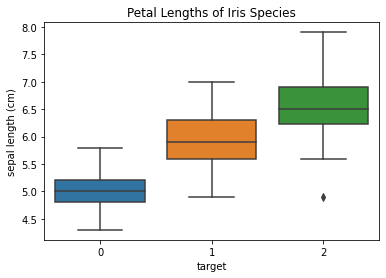

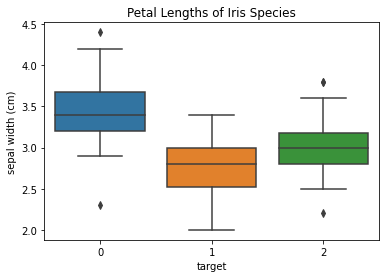

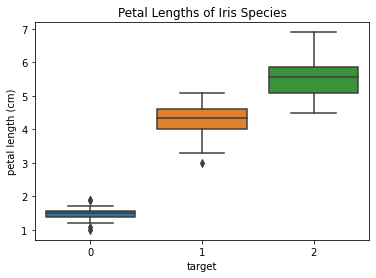

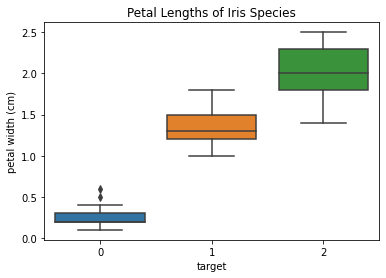

In [123]:
for feature in flowers.feature_names:
  sns.boxplot(y=feature,x='target',data=df)
  plt.title('Petal Lengths of Iris Species')
  plt.show()

**Inference**: there is clear distribution for each category

# Bivarate Analysis and Visualization

**Visualizing the pair plot**

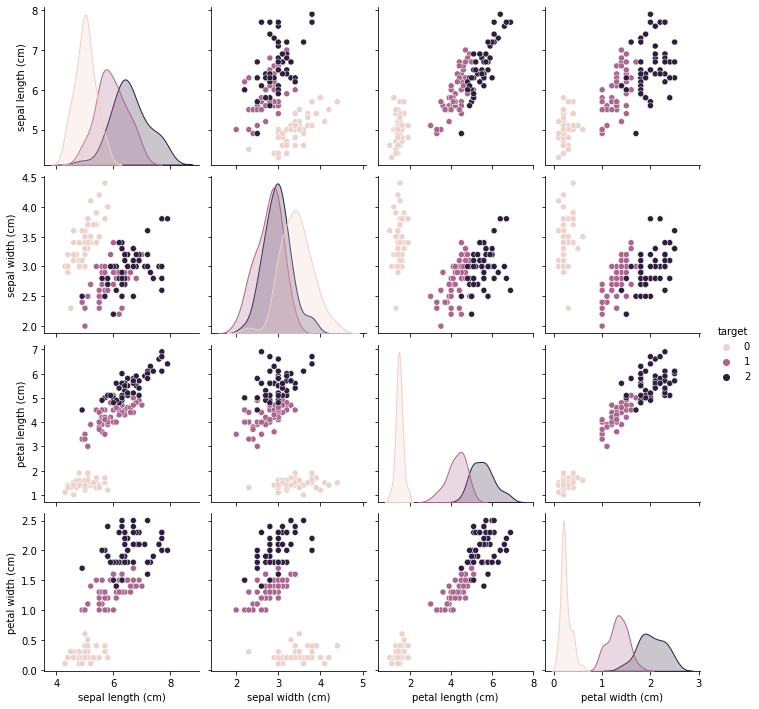

In [113]:
sns.pairplot(data=df, hue = 'target')

**Petel Length has high correlation with the petel width**

**Distribution of Petal** 

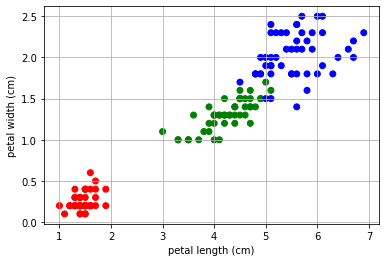

In [120]:
color = ['red' if v == 0 else 'green' if v == 1 else 'blue' for v in df.target]
plt.scatter(x = df['petal length (cm)'],y =  df['petal width (cm)'], c=color)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid()
plt.show()

**Sepals distribution is not highly correlated**

**Distribution of Sepels**

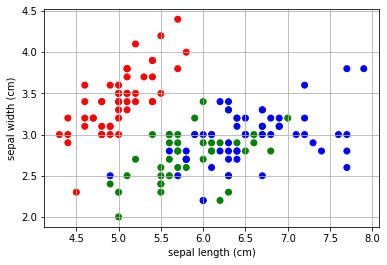

In [25]:
color = ['red' if v == 0 else 'green' if v == 1 else 'blue' for v in df.target]
plt.scatter(x = df['sepal length (cm)'],y = df['sepal width (cm)'], c=color)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.grid()
plt.show()

# train-test and Dependent and Independent Splitting of dataset

In [28]:
from sklearn.model_selection import train_test_split

**Dependent and Independent Splitting**

In [124]:
X = df.drop(['target'], axis=1)
y = df['target']

In [30]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [125]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

**train test splitting**

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [127]:
X_train.shape

(120, 4)

In [128]:
X_test.shape

(30, 4)

# Decision Tree Calssifier with Gini-Impurity

In [131]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [132]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [133]:
model.score(X_test, y_test)

1.0

**tuning with depth**

In [134]:
depths = range(1, 5)
test_score = []
train_score = []
for i in depths:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,y_train)
  test_score.append(model.score(X_train,y_train))
  train_score.append(model.score(X_test, y_test))

**plotting it**

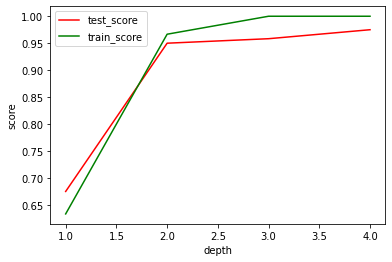

In [135]:
plt.plot(list(depths), test_score, color='r', label='test_score')
plt.plot(list(depths), train_score, color='g', label='train_score')
plt.legend()
plt.xlabel('depth')
plt.ylabel('score')
plt.show()

**Inference**: max-depth should be 3 or 4

**Tuning with the min_samples_leaf**

In [140]:
min_leaf = range(5, 20, 2)
test_score = []
train_score = []
for i in min_leaf:
  model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=i)
  model.fit(X_train,y_train)
  test_score.append(model.score(X_train,y_train))
  train_score.append(model.score(X_test, y_test))

**Plotting the score**

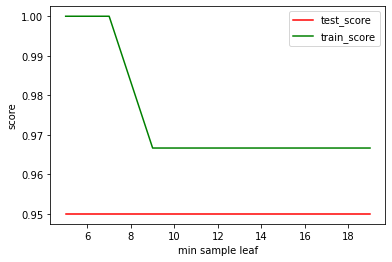

In [141]:
plt.plot(list(min_leaf), test_score, color='r', label='test_score')
plt.plot(list(min_leaf), train_score, color='g', label='train_score')
plt.legend()
plt.xlabel('min sample leaf')
plt.ylabel('score')
plt.show()

**Inference**: min_sample_leaf will be < 10

**Accuracy with min_samples_leaf = 8**

In [155]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

**Accuracy with min_samples_leaf = 9**

In [148]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=9)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

# Gini Impurity: classification report, Confusion Metric , and Decision Tree Splitting

In [149]:
#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree 
from sklearn.tree import plot_tree

In [156]:
# Predicting the values of test data
y_pred = model.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

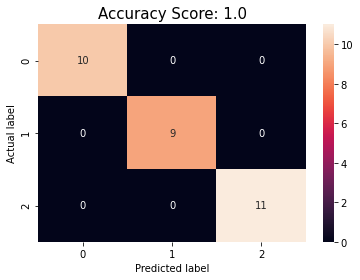

In [157]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


**Visualization of Discision Tree**

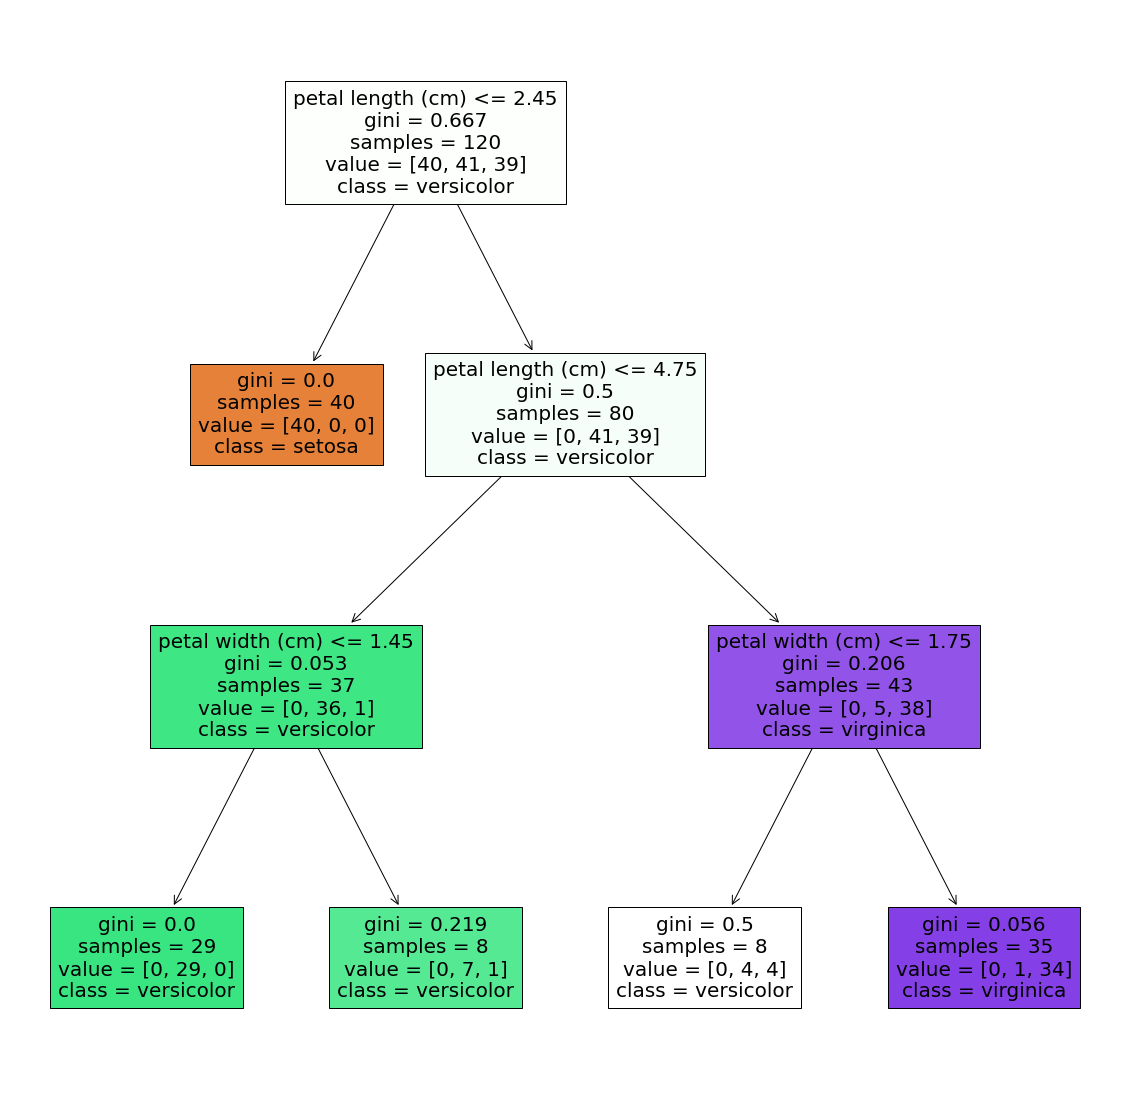

In [165]:
# Visualising the graph without the use of graphviz
plt.figure(figsize = (20,20))
dec_tree = plot_tree(model, 
                   feature_names=flowers.feature_names,  
                   class_names=flowers.target_names,
                   filled=True)

# Decision Tree with Entropy

**With Entropy**

In [169]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy')

In [173]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [174]:
model2.score(X_test, y_test)

0.9333333333333333

**tuning the model**

In [179]:
depths = range(1, 8)
test_score = []
train_score = []
for i in depths:
  temp_model = DecisionTreeClassifier(max_depth=i, criterion='entropy')
  temp_model.fit(X_train,y_train)
  test_score.append(temp_model.score(X_train,y_train))
  train_score.append(temp_model.score(X_test, y_test))

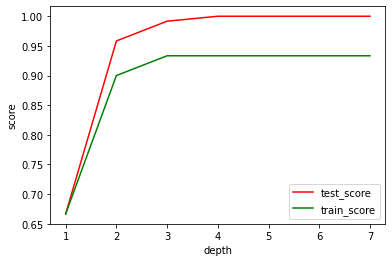

In [180]:
plt.plot(list(depths), test_score, color='r', label='test_score')
plt.plot(list(depths), train_score, color='g', label='train_score')
plt.legend()
plt.xlabel('depth')
plt.ylabel('score')
plt.show()

**Here maximum test score will be 0.93**

# Entropy: classification report, Confusion Metric , and Decision Tree Splitting

**Classification Report**

In [182]:
# Predicting the values of test data
y_pred = model2.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



**Confusion Metric**

Text(0.5, 1.0, 'Accuracy Score: 0.9333333333333333')

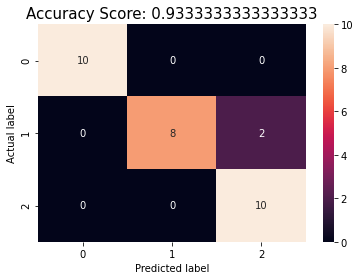

In [184]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model2.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


**Visualizing the Decision Tree**

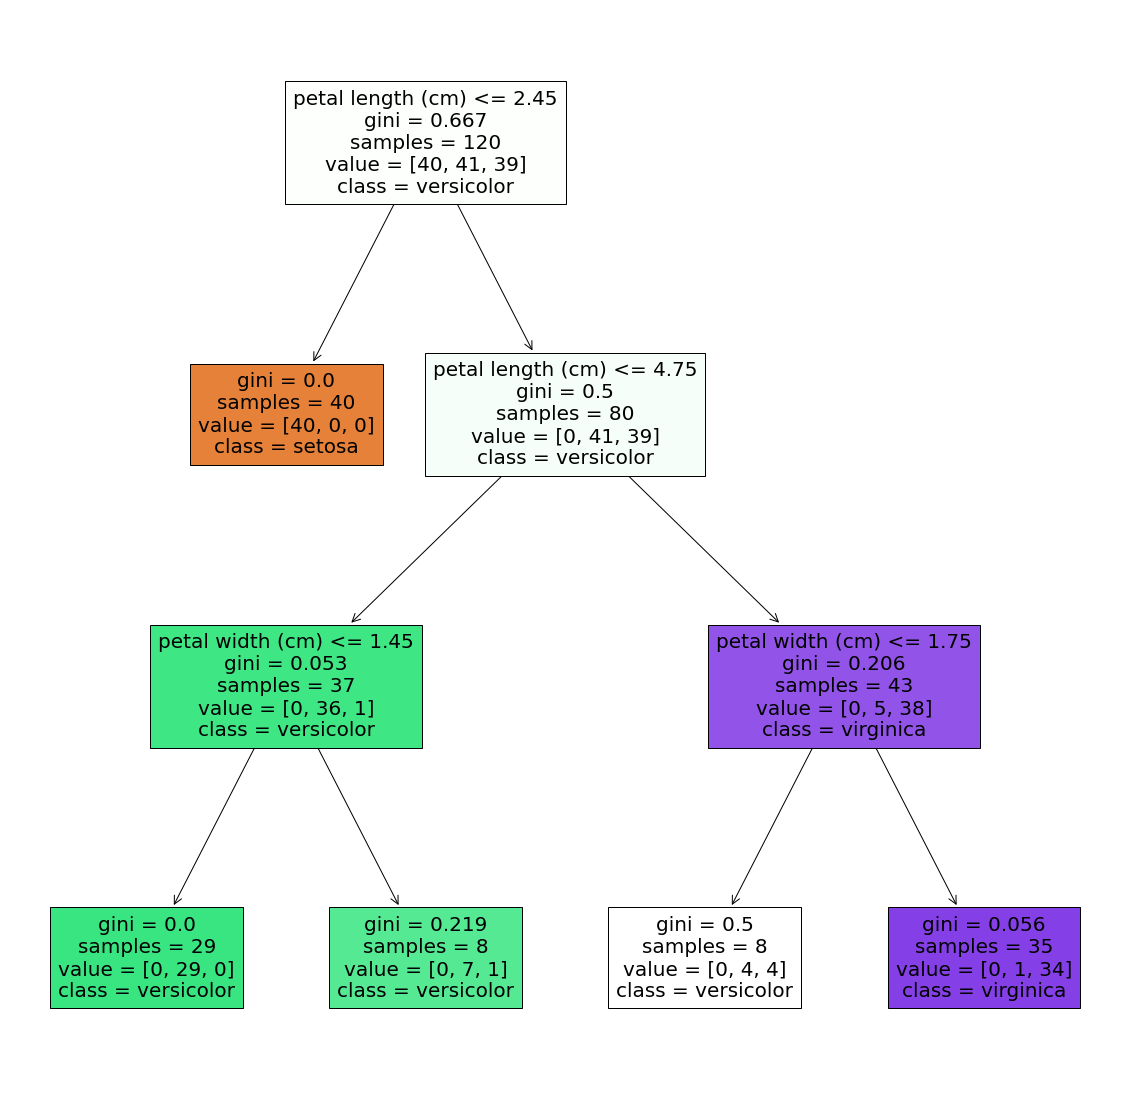

In [185]:
# Visualising the graph without the use of graphviz
plt.figure(figsize = (20,20))
dec_tree = plot_tree(model, 
                   feature_names=flowers.feature_names,  
                   class_names=flowers.target_names,
                   filled=True)